<a href="https://www.kaggle.com/code/zafarali27/2024-passport-power-analysis?scriptVersionId=210623871" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/visa-free-countries-dataset2024/countries_visa_free_access.csv


# About The Dataset 
> "2024 Passport Power and Global Mobility Index: Comprehensive Ranking of Countries by Visa-Free Travel Privileges and International   Accessibility"

# Context
This dataset presents a detailed ranking of global passports based on their international travel access, specifically focusing on the number of visa-free or visa-on-arrival destinations available to each country. Each record includes the country name, its ranking in terms of global mobility, and the total number of destinations accessible without a pre-approved visa. This index, curated for 2024, serves as an essential resource for understanding the disparities in passport power worldwide. With visa policies frequently evolving due to diplomatic relations, security concerns, and economic factors, the Passport Power and Global Mobility Index provides insights into the relative strength of each nation’s passport, influencing the ease of global travel for its citizens. This data is valuable for travelers, policymakers, and global mobility researchers analyzing the trends and factors behind international travel freedom.

# Import the library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/visa-free-countries-dataset2024/countries_visa_free_access.csv")

In [4]:
df.head()

,Country,Rank,Visa-Free Access
0,Singapore,1st,195
1,Finland,2nd,192
2,France,2nd,192
3,Germany,2nd,192
4,Italy,2nd,192


In [5]:
df.shape

(199, 3)

# Check the missing values

In [6]:
df.isnull().sum()

Country             0
Rank                0
Visa-Free Access    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           199 non-null    object
 1   Rank              199 non-null    object
 2   Visa-Free Access  199 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [8]:
df.describe()

,Visa-Free Access
count,199.000000
mean,110.738693
std,54.622137
min,26.000000
25%,60.000000
50%,95.000000
75%,165.500000
max,195.000000


# 1. Descriptive Analysis

* Which country ranks highest in global mobility?
* How many countries have visa-free access to more than 100 destinations?
* What is the average number of visa-free destinations across all countries?

In [9]:
# Assuming your dataset is loaded into a DataFrame named df
highest_ranked_country = df[df['Rank'] == "1st"]
print(highest_ranked_country[['Country', 'Visa-Free Access']])



     Country  Visa-Free Access
0  Singapore               195


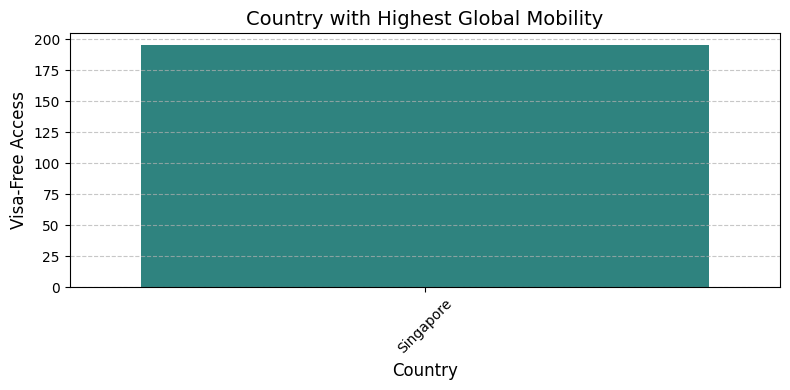

In [10]:
# Create the plot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=highest_ranked_country,
    x='Country',
    y='Visa-Free Access',
    palette='viridis'
)

# Customize the plot
plt.title('Country with Highest Global Mobility', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Visa-Free Access', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
# Filter the countries with visa-free access greater than 100
countries_with_high_access = df[df["Visa-Free Access"] > 100]

# Count the number of such countries
count = len(countries_with_high_access)
print(f"Number of countries with visa-free access to more than 100 destinations: {count}")

Number of countries with visa-free access to more than 100 destinations: 97


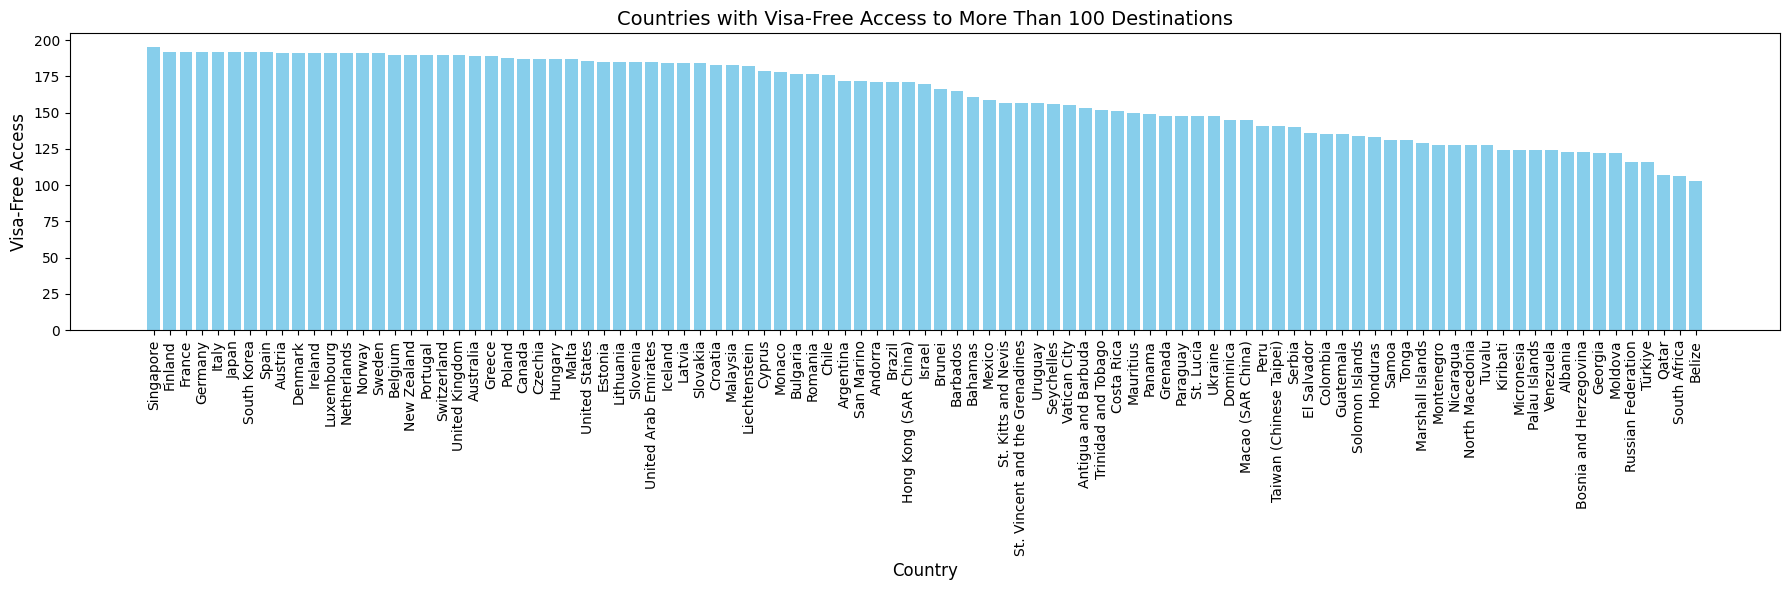

In [12]:
# Select country names and their Visa-Free Access values
country_names = countries_with_high_access['Country']
visa_free_access = countries_with_high_access['Visa-Free Access']

plt.figure(figsize=(18, 6))
plt.bar(country_names, visa_free_access, color='skyblue')


plt.title('Countries with Visa-Free Access to More Than 100 Destinations', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Visa-Free Access', fontsize=12)
plt.xticks(rotation=90)  
plt.tight_layout()


plt.show()


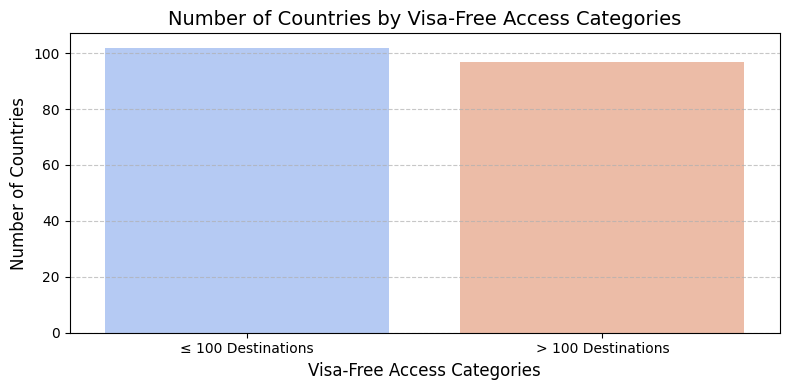

In [13]:
# Categorize countries based on visa-free access
df['Access Category'] = ['> 100 Destinations' if x > 100 else '≤ 100 Destinations' for x in df['Visa-Free Access']]

# Count the number of countries in each category
access_counts = df['Access Category'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 4))
sns.barplot(
    x=access_counts.index,
    y=access_counts.values,
    palette='coolwarm'
)

# Customize the plot
plt.title('Number of Countries by Visa-Free Access Categories', fontsize=14)
plt.xlabel('Visa-Free Access Categories', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
# Calculate the average number of visa-free destinations
average_visa_free_access = df["Visa-Free Access"].mean()
print(f"The average number of visa-free destinations across all countries is: {average_visa_free_access:.2f}")

The average number of visa-free destinations across all countries is: 110.74


# Comparative Analysis
* How does the top-ranked country compare with the lowest-ranked country in terms of visa-free access?

In [15]:
# Find the top-ranked country
top_ranked_country = df[df['Rank'] == "1st"]

# Find the lowest-ranked country
lowest_ranked_country = df[df['Rank'] == df['Rank'].max()]

# Extract the necessary information
top_country_info = top_ranked_country[['Country', 'Visa-Free Access']].iloc[0]
lowest_country_info = lowest_ranked_country[['Country', 'Visa-Free Access']].iloc[0]

# Display the comparison
print(f"Top-ranked country: {top_country_info['Country']} with {top_country_info['Visa-Free Access']} visa-free destinations.")
print(f"Lowest-ranked country: {lowest_country_info['Country']} with {lowest_country_info['Visa-Free Access']} visa-free destinations.")

# Difference in visa-free access
difference = top_country_info['Visa-Free Access'] - lowest_country_info['Visa-Free Access']
print(f"Difference in visa-free access: {difference} destinations.")


Top-ranked country: Singapore with 195 visa-free destinations.
Lowest-ranked country: Estonia with 185 visa-free destinations.
Difference in visa-free access: 10 destinations.


# Trend Analysis

* What is the distribution of countries by their rank?
* Are there any clusters of countries with similar visa-free access numbers?

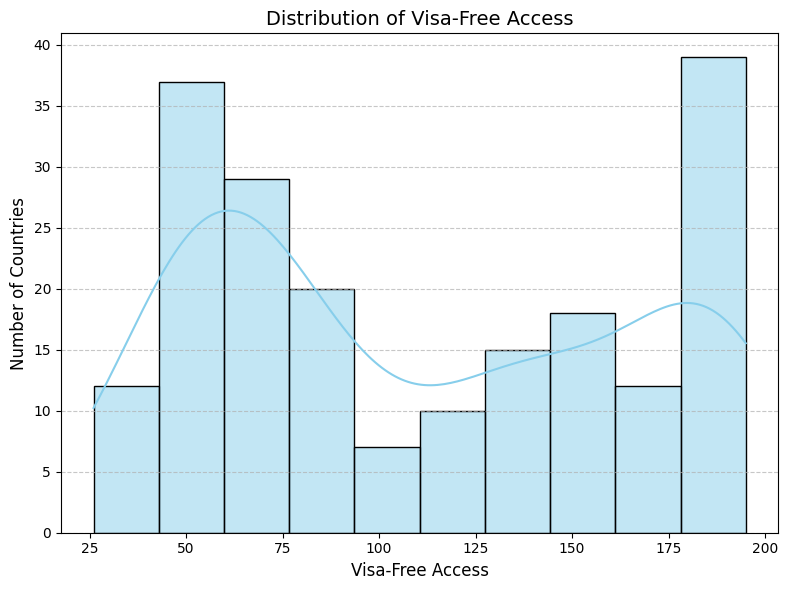

In [16]:
# Plot a histogram for the distribution of ranks
plt.figure(figsize=(8, 6))
sns.histplot(data = df, x= "Visa-Free Access", kde = True,bins=10,color='skyblue')
# Customize the plot
plt.title('Distribution of Visa-Free Access', fontsize=14)
plt.xlabel('Visa-Free Access', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

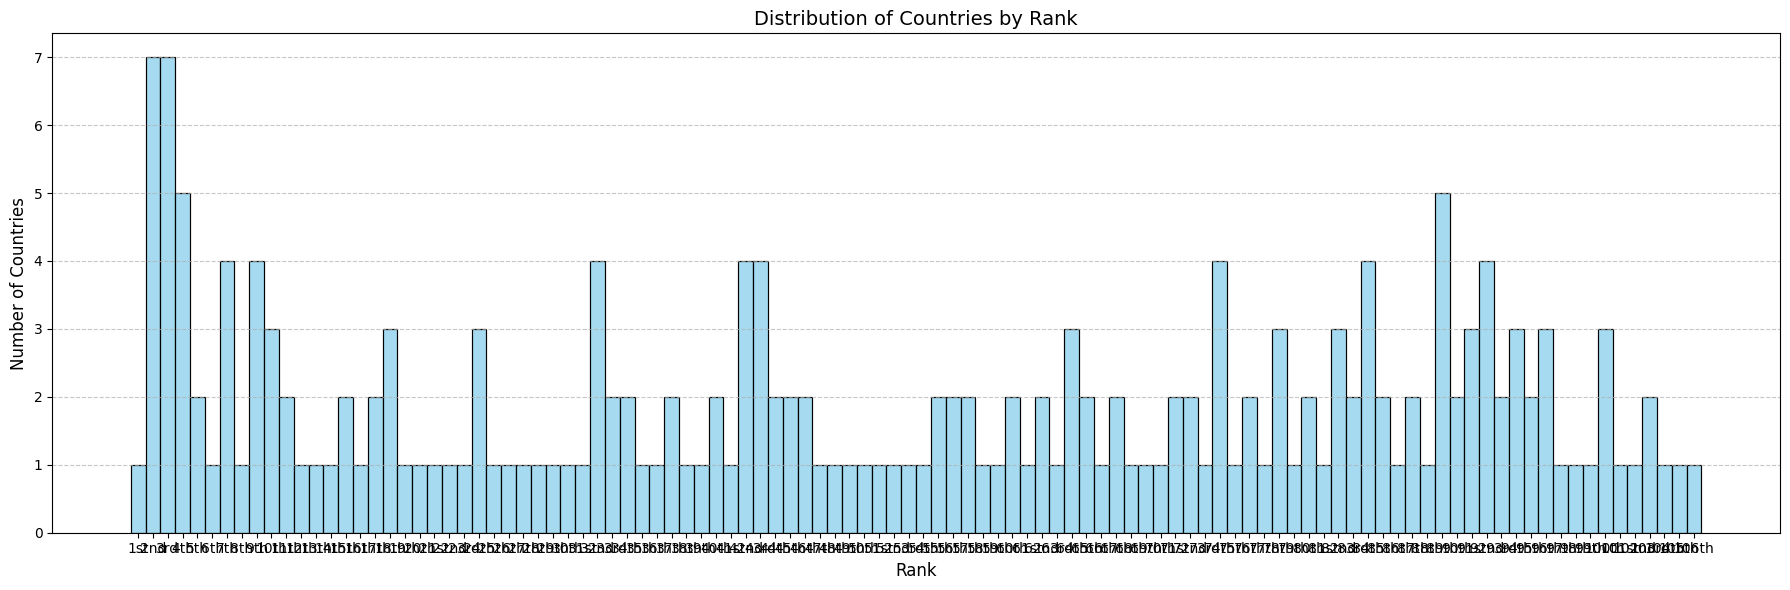

In [17]:
# Plot a histogram for the distribution of ranks
plt.figure(figsize=(18, 6))
sns.histplot(df['Rank'], bins=20, kde=False, color='skyblue')

# Customize the plot
plt.title('Distribution of Countries by Rank', fontsize=14)
plt.xlabel('Rank', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


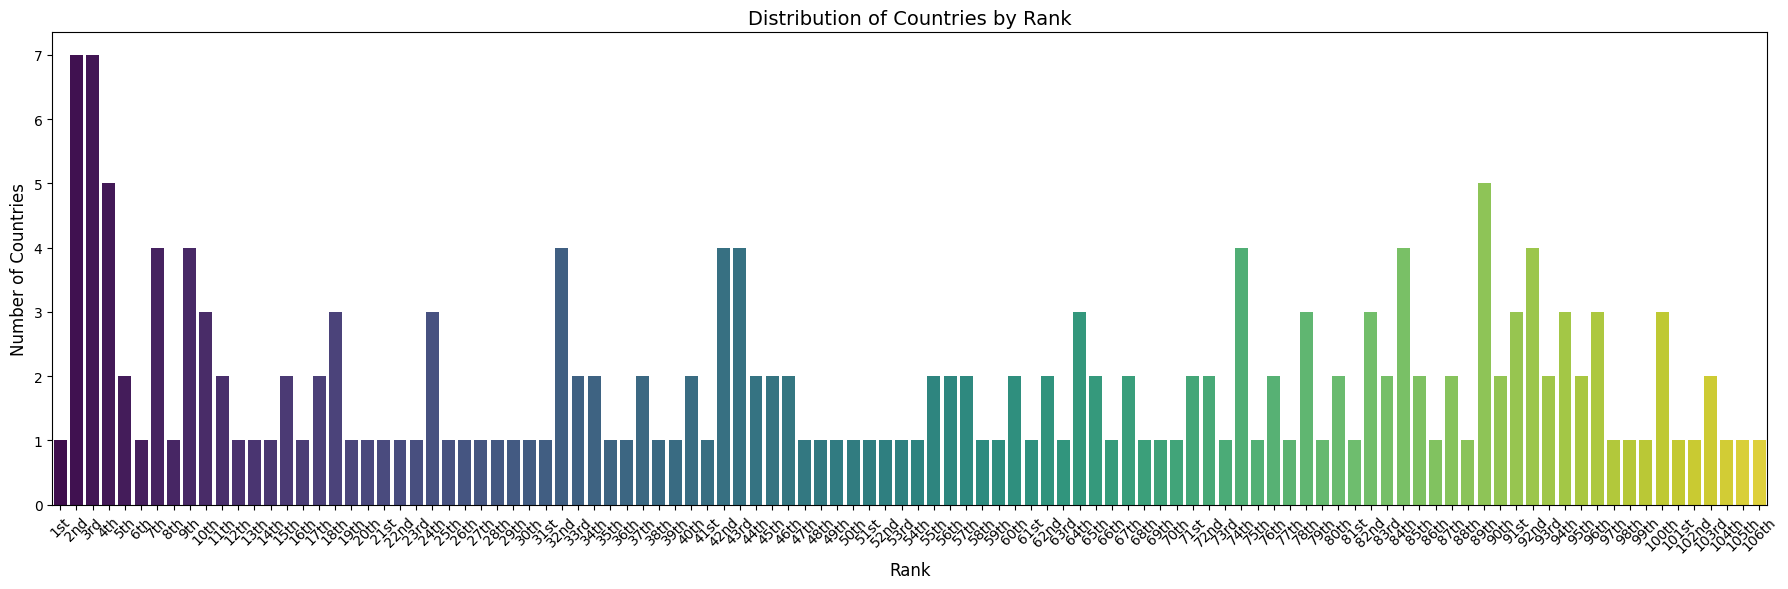

In [18]:
# Create a count plot
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='Rank', palette='viridis')

# Customize the plot
plt.title('Distribution of Countries by Rank', fontsize=14)
plt.xlabel('Rank', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


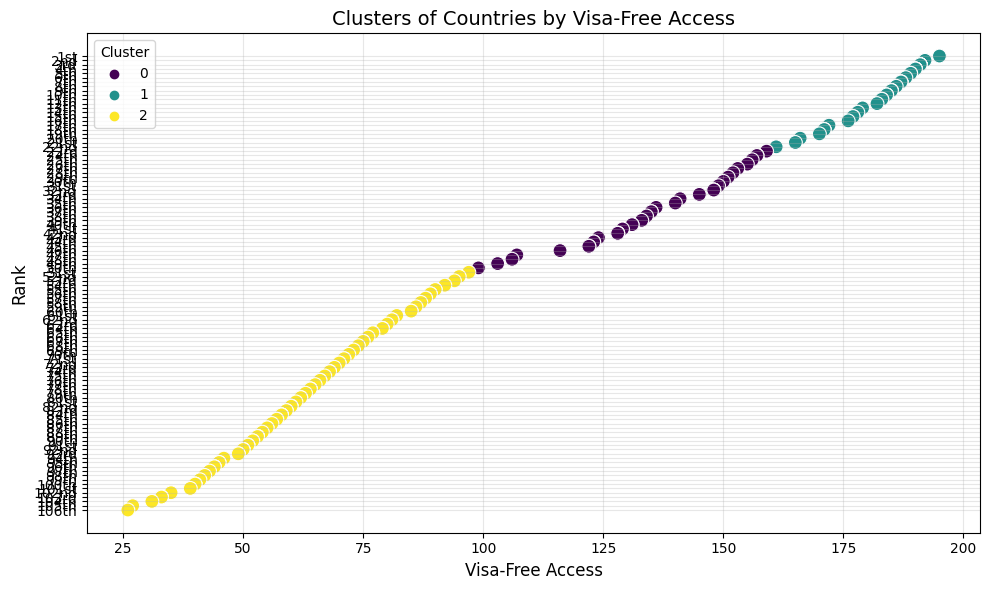

In [19]:
from sklearn.cluster import KMeans

# Select the relevant feature
X = df[['Visa-Free Access']]

# Perform K-means clustering (adjust n_clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Visa-Free Access', y='Rank', hue='Cluster', palette='viridis', s=100)

# Customize the plot
plt.title('Clusters of Countries by Visa-Free Access', fontsize=14)
plt.xlabel('Visa-Free Access', fontsize=12)
plt.ylabel('Rank', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='Cluster', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


# Impact and Correlation

* Is there a correlation between a country’s rank and the number of visa-free destinations?

In [20]:
# Remove non-numeric characters from the Rank column and convert it to numeric
df['Rank'] = df['Rank'].str.extract('(\d+)').astype(float)

Correlation coefficient between Rank and Visa-Free Access: -0.99


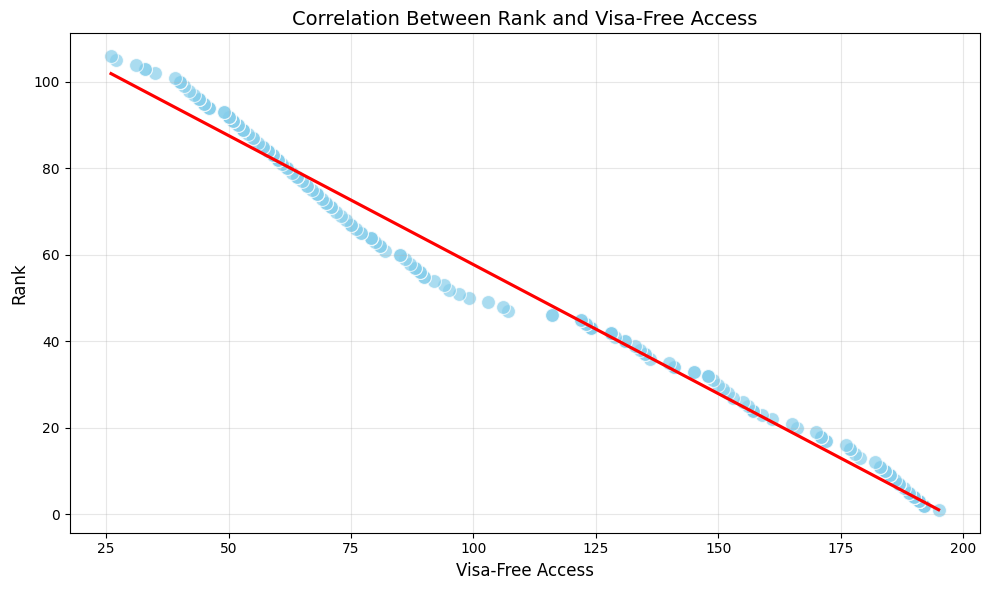

In [21]:
# Calculate the correlation coefficient
correlation = df['Rank'].corr(df['Visa-Free Access'])
print(f"Correlation coefficient between Rank and Visa-Free Access: {correlation:.2f}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Visa-Free Access', y='Rank', color='skyblue', s=100, alpha=0.7)

# Add a trendline
sns.regplot(data=df, x='Visa-Free Access', y='Rank', scatter=False, color='red', ci=None)

# Customize the plot
plt.title('Correlation Between Rank and Visa-Free Access', fontsize=14)
plt.xlabel('Visa-Free Access', fontsize=12)
plt.ylabel('Rank', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


# Thank you for visiting my notebook

![logo](https://user-images.githubusercontent.com/55389276/140866485-8fb1c876-9a8f-4d6a-98dc-08c4981eaf70.gif)